# Verificación de la notación indicial de las ecuaciones de compatibilidad de Saint-Venant y del tensor de compatibilidad de Saint-Venant

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | Febrero 2, 2023 | Creando código |
|Diego Andrés Álvarez Marín, <daalvarez@unal.edu.co> | Febrero 2, 2023 | Mejorando los comentarios |
|Diego Andrés Álvarez Marín, <daalvarez@unal.edu.co> | Junio 12, 2024 | Tensor de compatibilidad de Saint-Venant |

In [1]:
from sympy import init_printing, latex, symbols, simplify, zeros, Rational, Function, Matrix, Array, Eijk, diff

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

## 1. Verificación de la ecuación de Saint-Venant

A partir de la siguiente ecuación en notación indicial:

$$\varepsilon_{ij,km}+\varepsilon_{mk,ji}-\varepsilon_{ik,jm}-\varepsilon_{mj,ki}=0$$

Se busca extraer las 6 ecuaciones de compatibilidad de Saint-Venant.

Se definen las variables de posición:

In [2]:
x_ = symbols("x, y, z")

Creamos la matriz de deformaciones como una matriz en la que todos sus elementos dependen de $(x,y,z)$

In [3]:
e = zeros(3)
for i in range(3):
    for j in range(3):
        if i==j:
            e[i,j] = Function(f"varepsilon_{x_[i]}")(*x_)
        elif i<j:
            e[i,j] = e[j,i] = Rational(1/2)*Function(f"gamma_{x_[i]}{x_[j]}")(*x_)

In [4]:
imprimir(r"\boldsymbol{\varepsilon}(x,y,z) = ", e)

<IPython.core.display.Math object>

Creamos una lista para almacenar las ecuaciones a calcular:

In [5]:
ecu = []

Calculamos las ecuaciones: $\varepsilon_{ij,km}+\varepsilon_{mk,ji}-\varepsilon_{ik,jm}-\varepsilon_{mj,ki}=0$

In [6]:
for i in range(3):
    for j in range(3):
        for k in range(3):
            for m in range(3):
                res = simplify(+ e[i,j].diff(x_[k], x_[m])
                               + e[m,k].diff(x_[j], x_[i])
                               - e[i,k].diff(x_[j], x_[m])
                               - e[m,j].diff(x_[k], x_[i]))
                if res != 0:         # Se almacena la ecuación si es diferente de cero.
                    ecu.append(res)
                    
eqs = Matrix(ecu)  # Convertimos la lista a formato Matrix de sympy

In [7]:
eqs.shape  # Calculamos cuántas ecuaciones quedaron almacenadas

$\varepsilon_{ij,km}+\varepsilon_{mk,ji}-\varepsilon_{ik,jm}-\varepsilon_{mj,ki}=0$ al tener cuatro (4) subindices, tiene $3⁴=81$ ecuaciones posibles, pero después de descartar las que son cero (0), quedan solo 36.

Eliminamos las ecuaciones repetidas, haciéndolas iguales a cero:

In [8]:
for i in range(len(eqs)):
    if eqs[i] == 0: 
        continue
    for j in range(i+1, len(eqs)):
        if eqs[j] == 0: 
            continue
        if simplify(eqs[i] + eqs[j]) == 0 or simplify(eqs[i] - eqs[j]) == 0:
            eqs[j] = 0

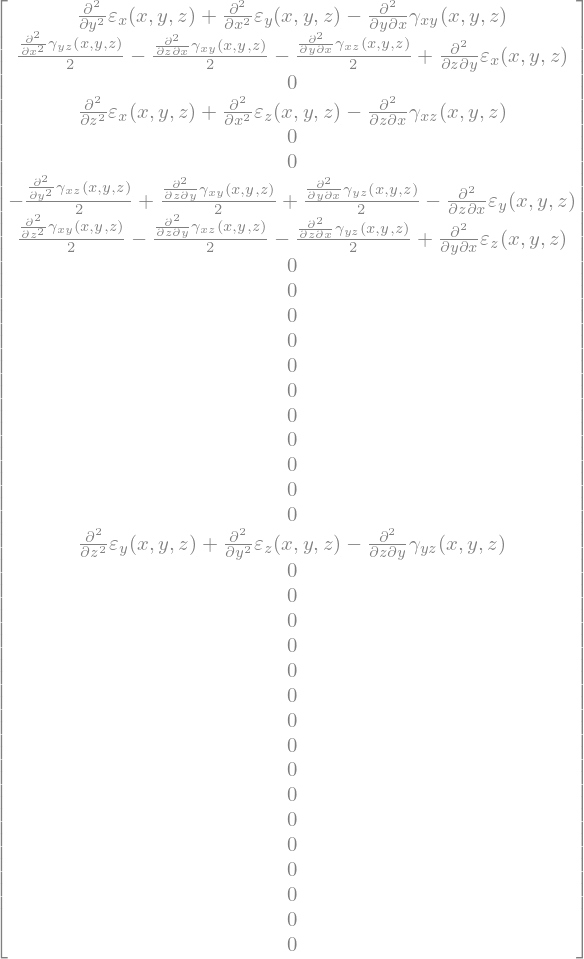

In [9]:
eqs

Eliminamos las ecuaciones repetidas que anteriormente convertimos en ceros:

In [10]:
eqs = Matrix([ i for i in eqs if i != 0 ])

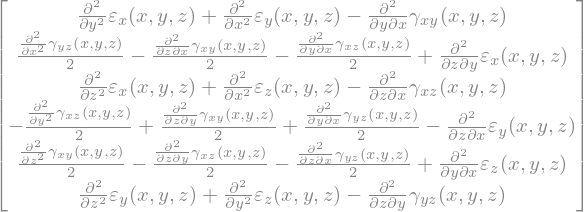

In [11]:
eqs

Finalmente, reorganizando llegamos a las siguientes seis (6) ecuaciones, que son las de compatibilidad de Saint-Venant:

$$\displaystyle\frac{\partial² \varepsilon_x}{\partial y²} + \frac{\partial² \varepsilon_y}{\partial x²}=\frac{\partial²\gamma_{xy}}{\partial x \partial y}$$
$$\displaystyle\frac{\partial² \varepsilon_y}{\partial z²} + \frac{\partial² \varepsilon_z}{\partial y²}=\frac{\partial²\gamma_{yz}}{\partial y \partial z}$$
$$\displaystyle\frac{\partial² \varepsilon_z}{\partial x²} + \frac{\partial² \varepsilon_x}{\partial z²}=\frac{\partial²\gamma_{xz}}{\partial x \partial z}$$

$$\displaystyle 2 \frac{\partial² \varepsilon_x}{\partial y \partial z}= \frac{\partial}{\partial x}\left( -\frac{\partial \gamma_{yz}}{\partial x} + \frac{\partial \gamma_{xz}}{\partial y} + \frac{\partial \gamma_{xy}}{\partial z}\right)$$

$$\displaystyle 2 \frac{\partial² \varepsilon_y}{\partial x \partial z}= \frac{\partial}{\partial x}\left( \frac{\partial \gamma_{yz}}{\partial x} - \frac{\partial \gamma_{xz}}{\partial y} + \frac{\partial \gamma_{xy}}{\partial z}\right)$$

$$\displaystyle 2 \frac{\partial² \varepsilon_z}{\partial x \partial y}= \frac{\partial}{\partial x}\left( \frac{\partial \gamma_{yz}}{\partial x} + \frac{\partial \gamma_{xz}}{\partial y} - \frac{\partial \gamma_{xy}}{\partial z}\right)$$

## 2. Verificación del tensor de compatibilidad de Saint-Venant

El rotacional para un tensor de segundo orden $\boldsymbol{M}$, se define como:
$$
\boldsymbol{\nabla}\times\boldsymbol{M} = e_{ijk} M_{rj,i}\mathbf{e}_k\otimes\mathbf{e}_r.
$$
donde $e_{ijk}$ es el símbolo de permutación o símbolo de Levi-Civita.

In [12]:
def curl(M):
    curlM = zeros(3)
    for k in range(3):
        for r in range(3):
            suma = 0
            for i in range(3):
                for j in range(3):
                    suma += Eijk(i,j,k)*diff(M[r,j], x_[i])
            curlM[k,r] = suma
    return curlM            

Las seis ecuaciones de Saint-Venant se pueden escribir en función del tensor de compatibilidad de Saint-Venant, el cual se define como el tensor de segundo orden:
$$
   \boldsymbol{R} := \boldsymbol{\nabla}\times(\boldsymbol{\nabla}\times\boldsymbol{\varepsilon});
$$
igualado a cero, esto es $\boldsymbol{R} = \boldsymbol{0}$.

In [13]:
R = curl(curl(e))
imprimir(r"\boldsymbol{R} = ", R)

<IPython.core.display.Math object>

Observe que el tensor de incompatibilidad de Saint-Venant es simétrico:

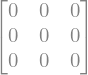

In [14]:
R - R.T

Se extraen entonces los elementos triangulares superiores:

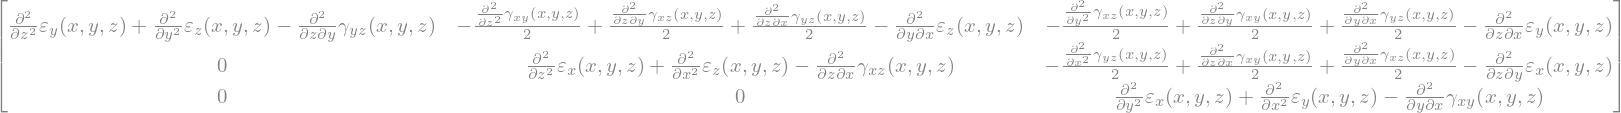

In [15]:
R.upper_triangular()

Con el comando:

In [16]:
imprimir("", R.vech(), r" = \boldsymbol{0}")

<IPython.core.display.Math object>

obtenemos de nuevo las ecuaciones de Saint-Venant.